In [59]:
import matplotlib.pyplot as plt
import numpy as np
import tools
import importlib
from scipy.optimize import curve_fit
import sys
import math
importlib.reload(tools)

<module 'tools' from '/home/ivan/AFM/Instanton/tools.py'>

In [60]:
importlib.reload(tools)
size_frac=0.25
size_inst=0.45
size_local=5
file="./runns6nt45b2.7nr45t3.1/test_data/profile4dt3.1c528to.dat"
file="./Tony/32x4/profile4dt0c5to.dat"
file="./Tony/45x6/profile4dt0c5to.dat"
density,sizes=tools.read_top(file)
density_2d,sizes_big,index_smal=tools.projection_2d(density,sizes)
inst, a_inst, frac, a_frac, t_frac, t_inst, total=tools.find_max_2d(density_2d,sizes_big,size_frac,size_inst,size_local)
tools.plot_dens_2d(file,density_2d,sizes_big,t_frac)

In [61]:
def inst(position,maxima,rho):
    #maxim=[23,23]
    return(3/(np.pi*rho**4)*(rho**2/((position[:,0]-maxima[0])**2 + (position[:,1]-maxima[1])**2+rho**2))**4)

In [62]:
def inst_plot(position,maxima,rho):
    #maxim=[23,23]
    return(3/(np.pi*rho**4)*(rho**2/((position[0]-maxima[0])**2 + (position[1]-maxima[1])**2+rho**2))**4)

In [63]:
x=[]
y=[]
data=[]
neigh=2
maxima=frac[0]
for i in range(-neigh,neigh+1):
    for j in range(-neigh,neigh+1):
        x=int(maxima[0])+i
        y=int(maxima[1])+j
        data.append([x,y,density_2d[x,y]])
data=np.array(data)

In [64]:
popt, pcov = curve_fit(lambda position,rho:inst(position,maxima,rho), data[:,:2], data[:,2])

In [65]:
data_plot=np.zeros((sizes_big[0],sizes_big[1]))
for i in range(0,sizes_big[0]):
    for j in range(0,sizes_big[1]):
        data_plot[i,j]=inst_plot([i,j],maxima,popt[0])


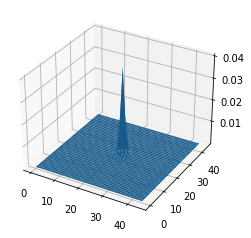

In [66]:
points=np.zeros((sizes[2],sizes[3]))

X = np.arange(0,sizes[2])
Y = np.arange(0,sizes[3])
X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.plot_surface(X,Y,data_plot)